In [15]:
# Importing the pandas library
import pandas as pd

# Load the dataset using the specified file path
file_path = 'C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\projects 2.0\\project 1 titanic data set\\titanic.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Markdown Explanation: Checking for Missing Values
Before analyzing the Titanic dataset, it's essential to check for missing values. Missing values can occur due to various reasons, such as data entry errors or incomplete data collection.

Importance of Checking for Missing Values:

Impact on Analysis: Missing values can skew statistical measures like means and correlations, leading to incorrect conclusions.
Decision-Making: Identifying missing data helps determine appropriate handling methods, such as imputation or removal of affected rows.
Model Performance: Many machine learning algorithms require complete datasets; thus, addressing missing values is crucial for effective modeling.

In [16]:
# Check for missing values in the dataset
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Markdown Explanation: Handling Missing Values
In the Titanic dataset, we identified missing values in several columns, particularly in 'Age' (177 missing) and 'Embarked' (2 missing). Addressing these missing values is crucial for accurate analysis.

Handling Strategies:

Numerical Values (e.g., 'Age'): We will fill missing values with the median. The median is a robust measure that is less affected by outliers, making it a suitable choice for age data.

Categorical Values (e.g., 'Embarked'): We will fill missing values with the mode, which represents the most frequently occurring category. This approach ensures that the categorical distribution is preserved.

In [17]:
# Fill missing 'Age' with the median and assign it back to the column
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Fill missing 'Embarked' with the mode and assign it back to the column
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Optionally, print the updated count of missing values
missing_values_after = titanic_data.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)


Missing Values After Handling:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Markdown Explanation: Handling Outliers Using Visualizations
To effectively analyze the Titanic dataset, we will visualize the 'Fare' column using a box plot. This visualization is instrumental in identifying outliers—data points that deviate significantly from the majority of the data.

Importance of Visualizing Outliers:

Clarity: Box plots provide a clear visual representation of the data distribution, including the median, quartiles, and potential outliers.
Impact on Analysis: Identifying outliers is crucial as they can skew statistical analyses and affect the overall conclusions drawn from the dataset.
Informed Decisions: By visualizing outliers, we can make informed decisions on whether to keep, remove, or transform these values for further analysis.

In [18]:
!pip uninstall seaborn -y
!pip install seaborn


Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [19]:
!pip uninstall scipy -y
!pip install scipy



Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1


You can safely remove it manually.
You can safely remove it manually.


  Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp311-cp311-win_amd64.whl (44.8 MB)


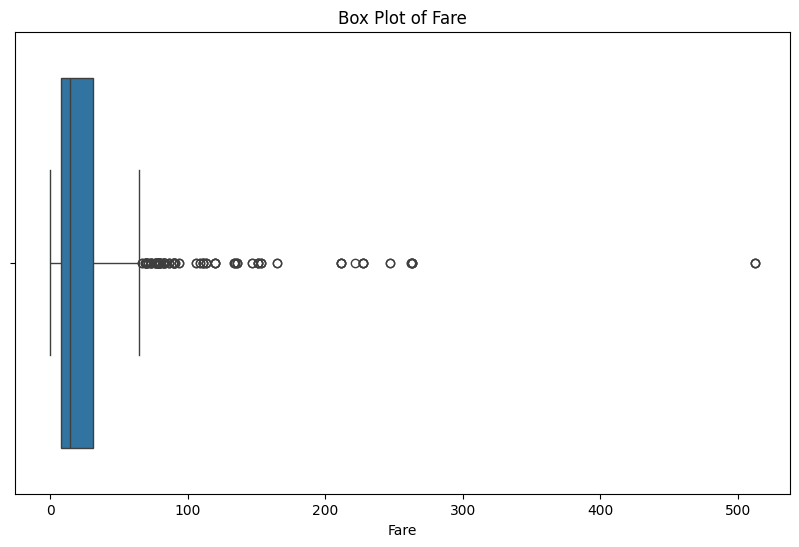

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the 'Fare' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic_data['Fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()


Markdown Explanation: Exploratory Data Analysis (EDA) - Step 3.1: Descriptive Statistics
In this step of our Exploratory Data Analysis (EDA), we will generate basic descriptive statistics using Pandas. This analysis provides valuable insights into our dataset, including:

Data Distribution: Understanding how the data is spread across different values.
Central Tendencies:
Mean: The average value, representing the overall trend of the data.
Median: The middle value when the data is sorted, offering a robust measure less influenced by outliers.
Variability:
Standard Deviation: A measure that indicates how much the values in a dataset deviate from the mean, reflecting the spread of the data points

In [21]:
# Generate descriptive statistics for numerical columns
descriptive_stats = titanic_data.describe()

# Display the descriptive statistics
print("Descriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Markdown Explanation: Analyzing Categorical Columns
In this step of our Exploratory Data Analysis (EDA), we will explore the categorical columns in the Titanic dataset to understand the distribution of different categories. Analyzing categorical data is crucial for identifying patterns and insights that can impact our understanding of the dataset.

Key Categorical Columns to Explore:

Passenger Class ('Pclass'): This column indicates the class of travel for each passenger (1st, 2nd, or 3rd class). Analyzing the distribution of passengers across these classes can reveal insights into survival rates and social demographics.

Survival Status ('Survived'): This column indicates whether a passenger survived (1) or not (0). Understanding the distribution of survivors will help us analyze factors influencing survival.

In [22]:
# Analyze the distribution of passengers in each class ('Pclass')
pclass_distribution = titanic_data['Pclass'].value_counts()
print("Distribution of Passengers by Class:\n", pclass_distribution)

# Analyze the distribution of survivors ('Survived')
survival_distribution = titanic_data['Survived'].value_counts()
print("\nDistribution of Survivors:\n", survival_distribution)


Distribution of Passengers by Class:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Distribution of Survivors:
 Survived
0    549
1    342
Name: count, dtype: int64


Markdown Explanation: Identifying Patterns and Relationships
In this step of our Exploratory Data Analysis (EDA), we will explore the relationships between different features in the Titanic dataset. Understanding these relationships is crucial for uncovering insights that may influence survival rates and other important outcomes.

Key Focus:

Survival Rate by Class: We will analyze how the survival rate varies across different passenger classes ('Pclass'). This analysis can reveal whether passengers in higher classes had a better chance of survival compared to those in lower classes.
Method:

We will use grouping to calculate the average survival rate for each class, providing a clear picture of how class status impacted survival.

In [23]:
# Calculate the survival rate by passenger class
survival_rate_by_class = titanic_data.groupby('Pclass')['Survived'].mean()

# Display the survival rates
print("Survival Rate by Passenger Class:\n", survival_rate_by_class)


Survival Rate by Passenger Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Markdown Explanation: Data Visualization for EDA
Visualization is a powerful tool in Exploratory Data Analysis (EDA) that helps us identify patterns, trends, and relationships more effectively. In this section, we will create various plots to enhance our understanding of the dataset.

Key Visualizations:

Histogram for Age Distribution: We will plot a histogram to observe the distribution of ages among passengers, which will help us understand the age demographics on the Titanic.

Bar Plot for Survival Rate by Class: We will create a bar plot to analyze survival rates across different passenger classes. This will allow us to visually compare how survival probabilities differ based on class status.

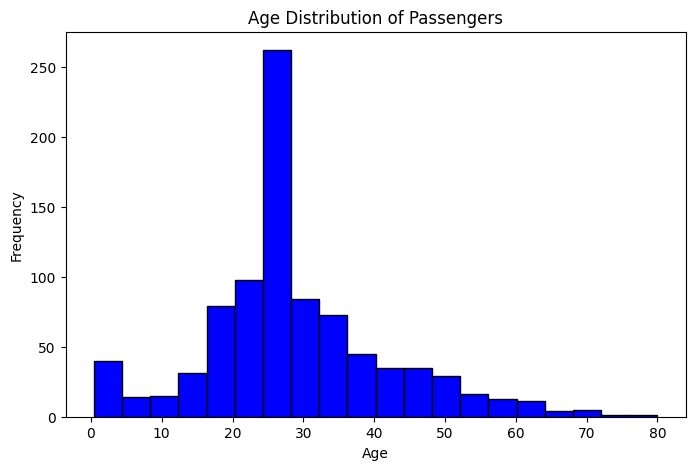

In [24]:
# Plot a histogram for 'Age' distribution
plt.figure(figsize=(8, 5))
plt.hist(titanic_data['Age'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


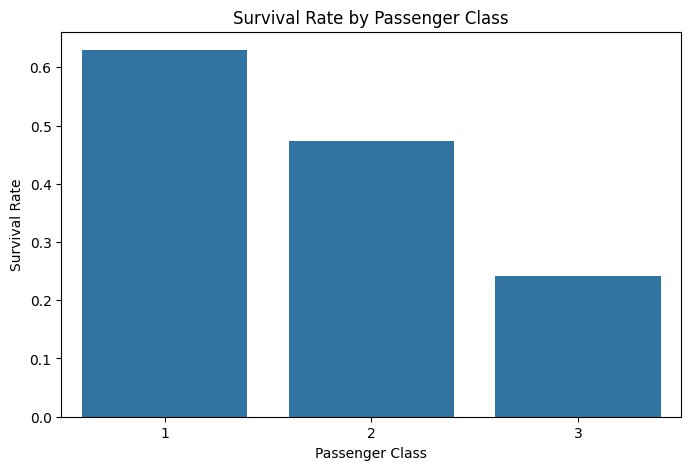

In [25]:
# Bar plot for survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Creating a Heatmap for Categorical Features
In this section, we will create a heatmap to visualize the relationship between passenger class (Pclass) and survival (Survived). This analysis helps us understand how survival rates differ across passenger classes.

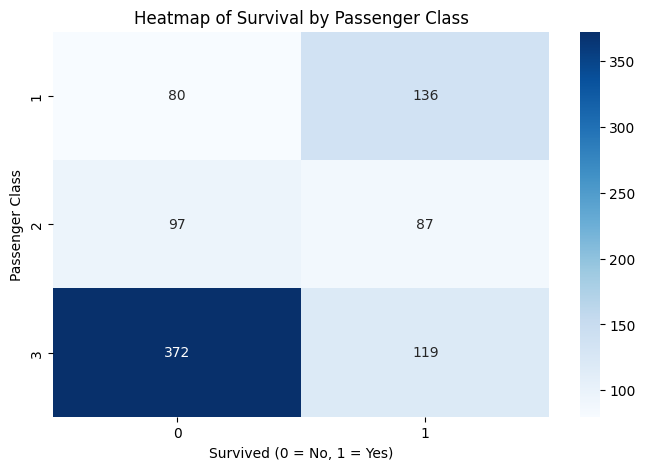

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (ensure this is done earlier in your notebook)
# file_path = 'C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\projects 2.0\\project 1 titanic data set\\titanic.csv'
# titanic_data = pd.read_csv(file_path)

# Create a pivot table for Pclass and Survived
pivot_table = titanic_data.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')

# Create a heatmap to visualize the relationship
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='Blues')
plt.title('Heatmap of Survival by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Class')
plt.show()


Scatter Plot for Numerical Relationships
In this section, we will create a scatter plot to analyze the relationship between two numerical variables: 'Age' and 'Fare'. Scatter plots are effective tools for visualizing relationships and can help identify any patterns, trends, or correlations between the variables.

Purpose of the Scatter Plot:

Visualize Relationships: By plotting 'Age' against 'Fare', we can observe how ticket prices vary with age, potentially revealing insights about fare distribution among different age groups.
Identify Patterns: The scatter plot may show clustering of data points or trends, such as whether younger or older passengers tend to pay more for tickets.

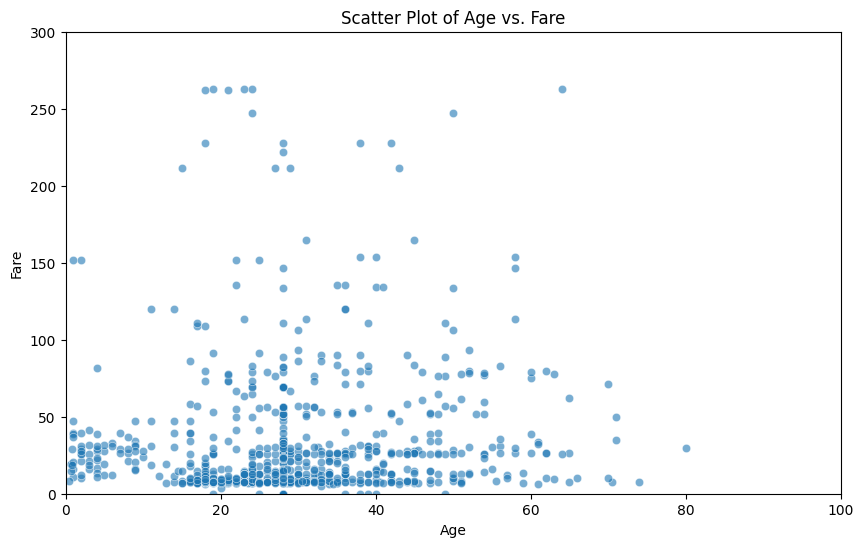

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for 'Age' vs 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_data, x='Age', y='Fare', alpha=0.6)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.xlim(0, 100)  # Set x-axis limits for better visualization
plt.ylim(0, 300)  # Set y-axis limits for better visualization
plt.show()


Visualizing Survival Rate by Gender
In this section, we will create a bar plot to visualize the survival rates of passengers based on gender. Understanding how gender impacted survival chances on the Titanic is crucial for analyzing social factors and behaviors during the disaster.

Purpose of the Bar Plot:

Compare Survival Rates: The bar plot will allow us to visually compare the survival rates between male and female passengers.
Identify Trends: By examining the plot, we can determine if there was a significant difference in survival rates between genders, which may reflect societal norms and behaviors during the tragedy.

C:\Users\ARUN\AppData\Local\Temp\ipykernel_17708\4162184863.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values, palette='pastel')


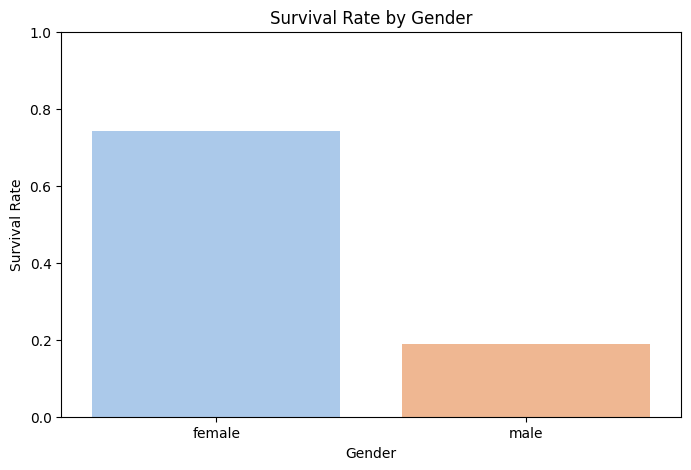

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival rates by gender
survival_rate_by_gender = titanic_data.groupby('Sex')['Survived'].mean()

# Create a bar plot to visualize survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limits for clarity (0 to 1)
plt.show()


Box Plot for Fare by Passenger Class
In this section, we will create a box plot to analyze how fares varied across different passenger classes (1st, 2nd, and 3rd class) on the Titanic. A box plot is an effective way to summarize the distribution of data by displaying its minimum, first quartile, median, third quartile, and maximum values.

Purpose of the Box Plot:

Summarize Data Distribution: The box plot will provide a clear overview of fare distributions within each class, helping us identify differences in pricing strategies and potential outliers.
Identify Outliers: By visualizing the spread of fares, we can detect any outliers that may exist within the fare data for each class.

C:\Users\ARUN\AppData\Local\Temp\ipykernel_17708\655965549.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=titanic_data, palette='pastel')


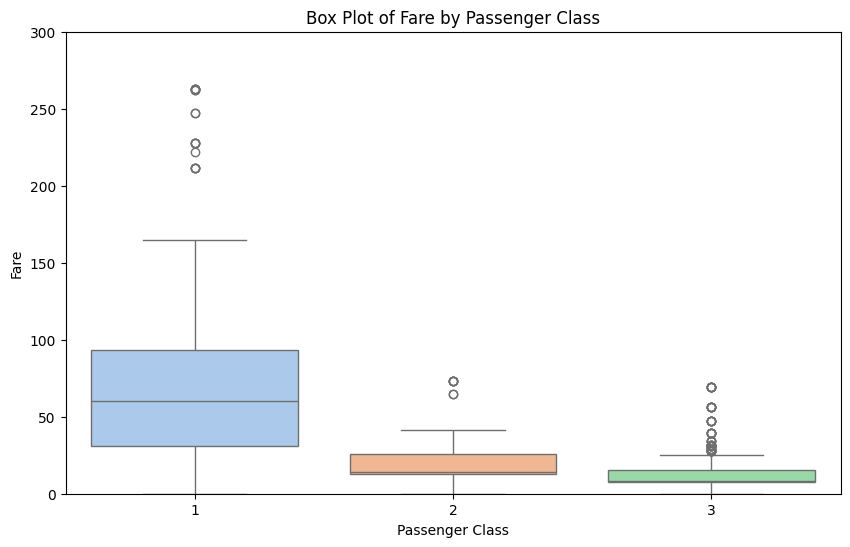

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for 'Fare' by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data, palette='pastel')
plt.title('Box Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.ylim(0, 300)  # Set y-axis limits for better visualization
plt.show()
